In [171]:
!pip install scikit-learn > None

In [172]:
!pip install scipy > None

In [173]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [174]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [175]:
from scipy.stats import boxcox
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [176]:
from sklearn.preprocessing import quantile_transform

In [177]:
df = pd.read_csv('/content/O_nan.csv')

In [178]:
nan_after = df.isna().sum()
print(f"Number of NaN values : {nan_after}")

Number of NaN values : Area/volume                                      0
Max/min(size)                                    0
org_coating_HAcceptors                           0
org_coating_LogP                                 0
common_spin                                      0
Effective anisotropy constant (J/m3)             0
magnetic anisotropy constant (J/m3)              0
magnetocrystalline anisotropy constant (J/m3)    0
Anisotropy constant                              0
Crystalline                                      0
MAE                                              0
Curie temperature (K)                            0
Spehricity                                       0
exchange constant (J/m) *10^-12                  0
Electronegativity core                           0
Space group                                      0
Demagnetization factors (Nd)                     0
Saturation magnetization (emu/g)                 0
Coercivity (Oe)                                  0
Remanenc

Преобразуем названия для хорошего показа графиков

In [179]:
df = df.rename(columns = {'Effective anisotropy constant (J/m3)': 'Eff_anisotropy_const'})
df = df.rename(columns = {'Curie temperature (K)': 'Curie_temperature'})
df = df.rename(columns = {'exchange constant (J/m) *10^-12': 'Exchange_constant'})
df = df.rename(columns = {'Demagnetization factors (Nd)': 'Demagnetization_factors'})
df = df.rename(columns = {'Saturation magnetization (emu/g)': 'Saturation_magnetization'})
df = df.rename(columns = {'Max/min(size)': 'Max/min'})
df = df.rename(columns = {'Coercivity (Oe)': 'Coercivity'})
df = df.rename(columns = {'Remanence magnetization (emu/g)': 'Remanence_magnetization'})
df = df.rename(columns = {'interdomain coupling (alpha)': 'Interdomain_coupling'})
df = df.rename(columns = {'mass_magnetic_susceptibility(emu/Oe*g)': 'M_magnetic_susceptibility'})
df = df.rename(columns = {'magnetic anisotropy constant (J/m3)': 'Magnetic_anisotropy'})
df = df.rename(columns = {'magnetocrystalline anisotropy constant (J/m3)': 'Magnetocrystalline_anisotropy'})
df = df.rename(columns = {'magnetocrystalline anisotropy energy (MAE) (J/m3)': 'MAE'})

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area/volume                    568 non-null    float64
 1   Max/min                        568 non-null    float64
 2   org_coating_HAcceptors         568 non-null    float64
 3   org_coating_LogP               568 non-null    float64
 4   common_spin                    568 non-null    float64
 5   Eff_anisotropy_const           568 non-null    float64
 6   Magnetic_anisotropy            568 non-null    float64
 7   Magnetocrystalline_anisotropy  568 non-null    float64
 8   Anisotropy constant            568 non-null    float64
 9   Crystalline                    568 non-null    float64
 10  MAE                            568 non-null    float64
 11  Curie_temperature              568 non-null    float64
 12  Spehricity                     568 non-null    flo

In [181]:
df.columns.tolist()

['Area/volume',
 'Max/min',
 'org_coating_HAcceptors',
 'org_coating_LogP',
 'common_spin',
 'Eff_anisotropy_const',
 'Magnetic_anisotropy',
 'Magnetocrystalline_anisotropy',
 'Anisotropy constant ',
 'Crystalline',
 'MAE',
 'Curie_temperature',
 'Spehricity',
 'Exchange_constant',
 'Electronegativity core',
 'Space group',
 'Demagnetization_factors',
 'Saturation_magnetization',
 'Coercivity',
 'Remanence_magnetization',
 'Interdomain_coupling',
 'M_magnetic_susceptibility']

Приведём все данные в диапазон от 0 до 1

In [182]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [183]:
for i in df.columns:
  df[i] = scaler.fit_transform(df[[i]])

In [184]:
sns.set(style="whitegrid")

Видно, что колонки Eff_anisotropy, Electronegativity of core и Saturation magnetization имеют аномалии, которые можно удалить.
А вот Coercivity похоже на логарифмическое распределение

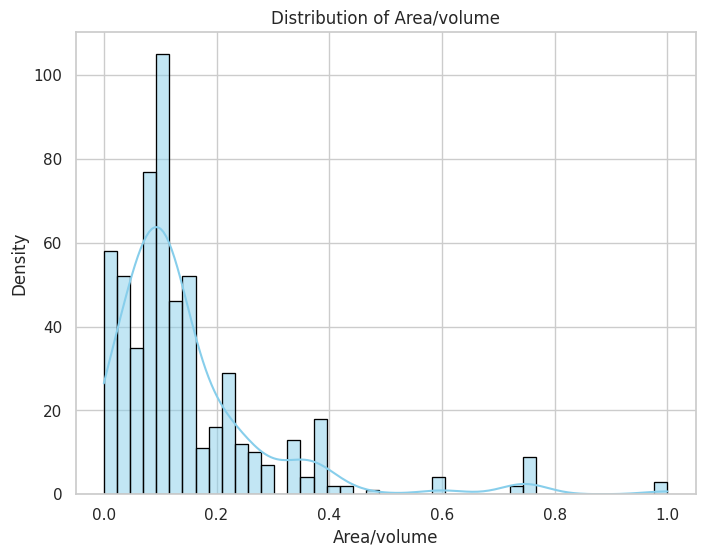

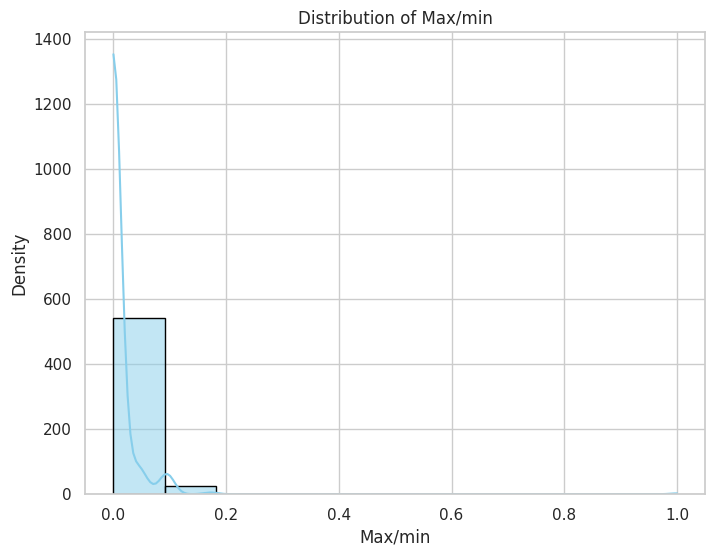

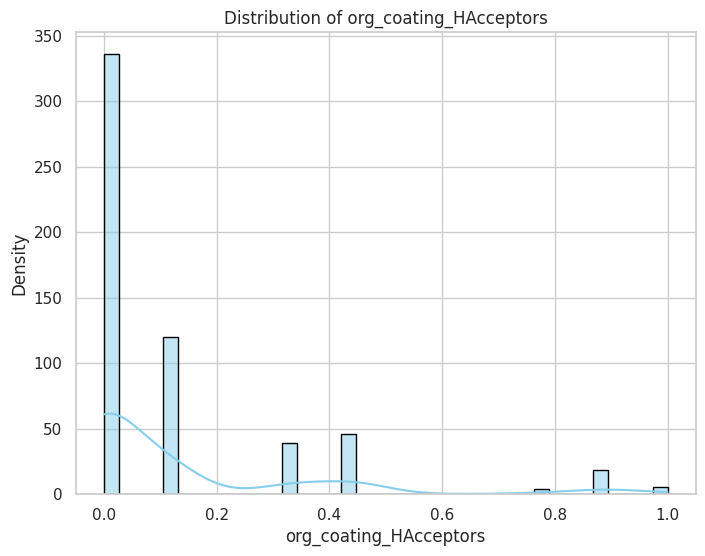

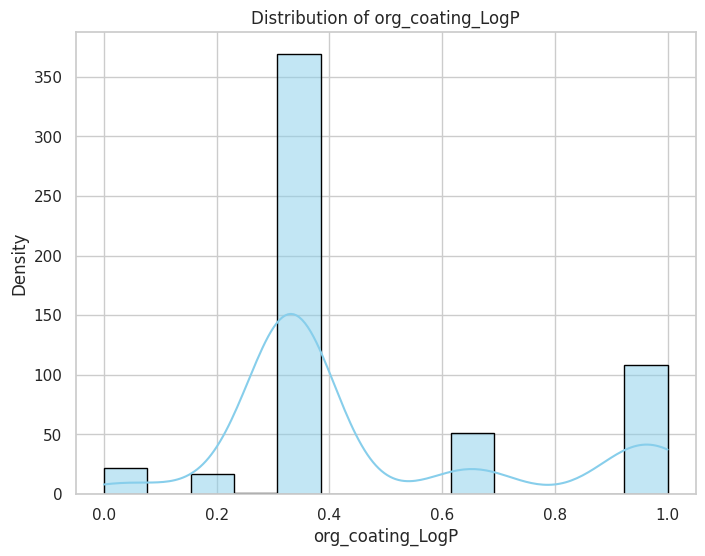

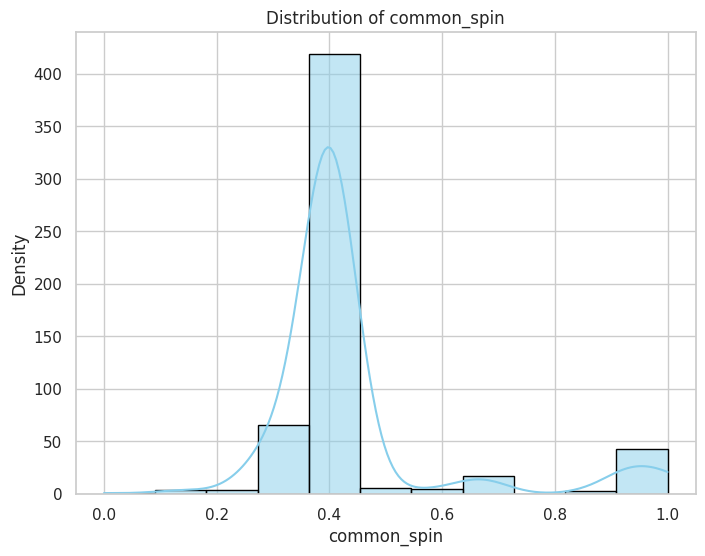

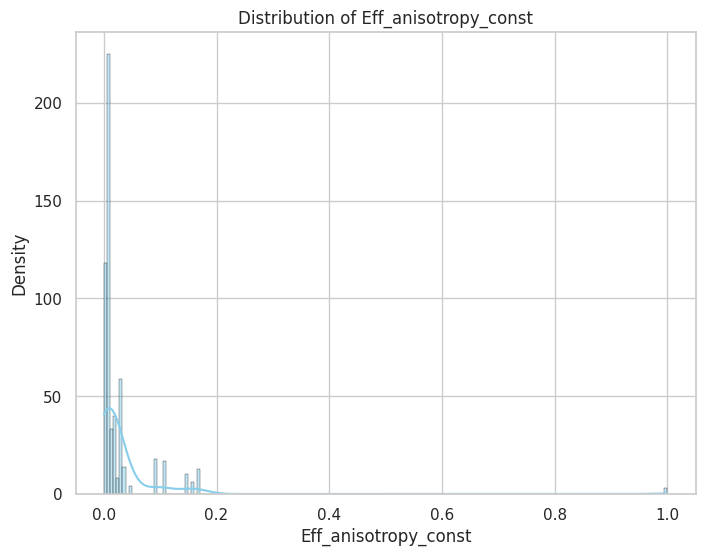

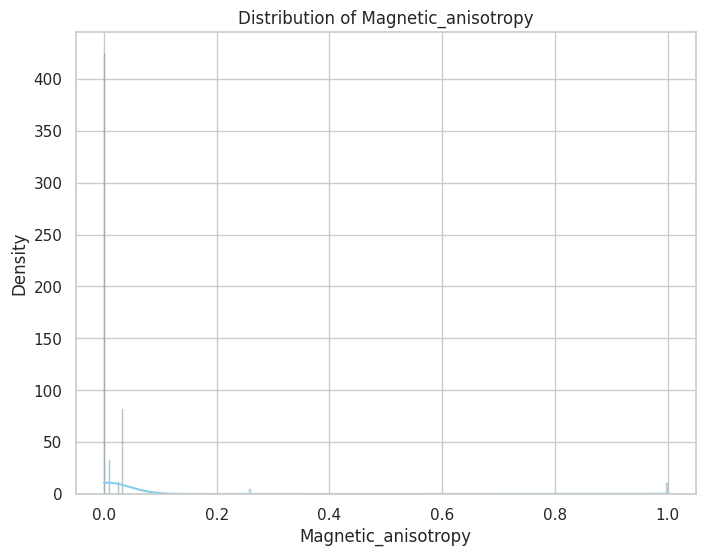

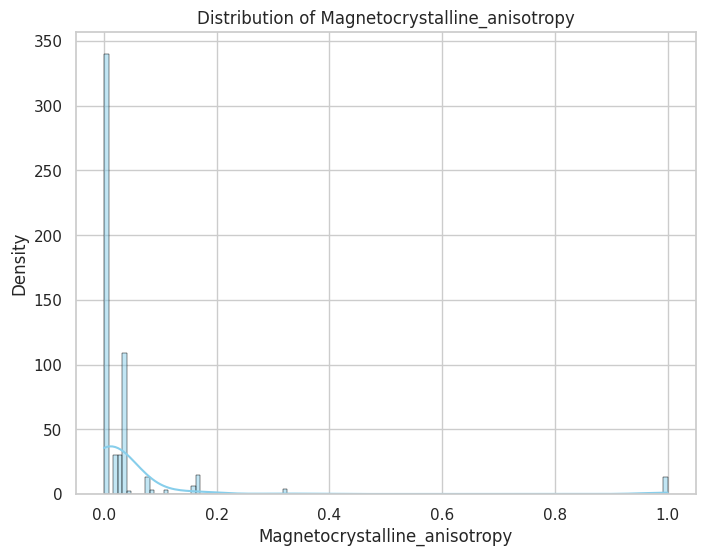

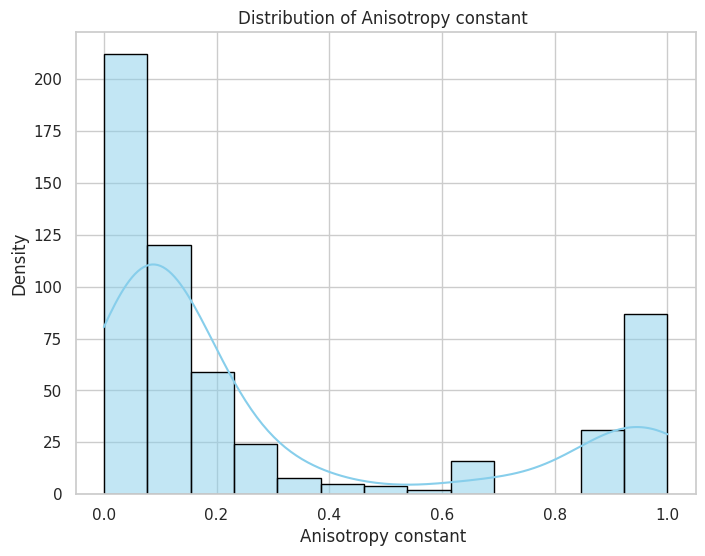

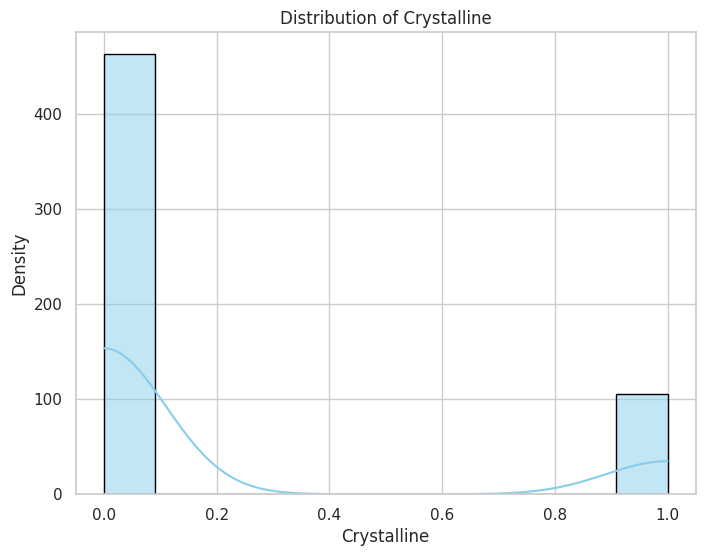

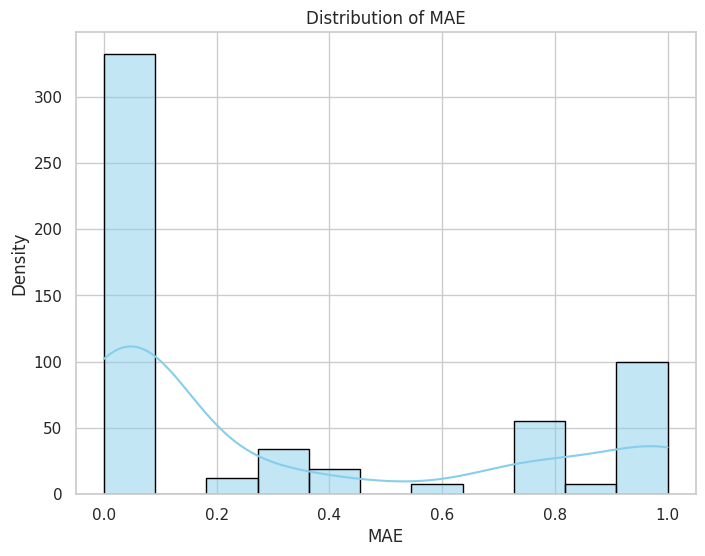

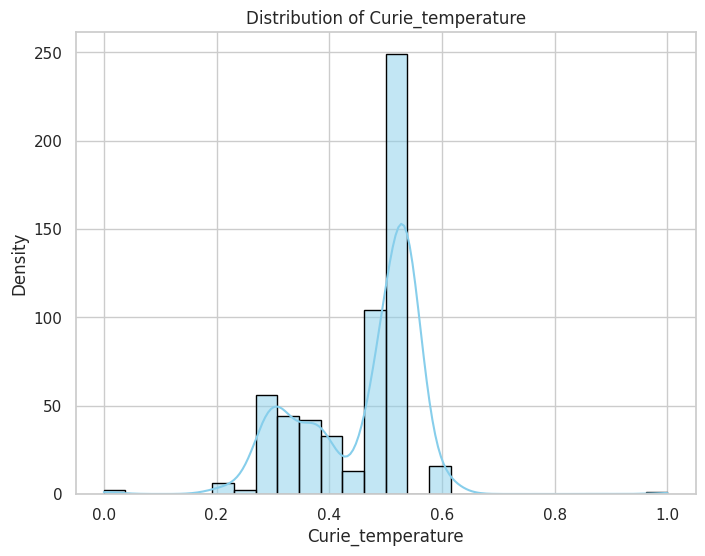

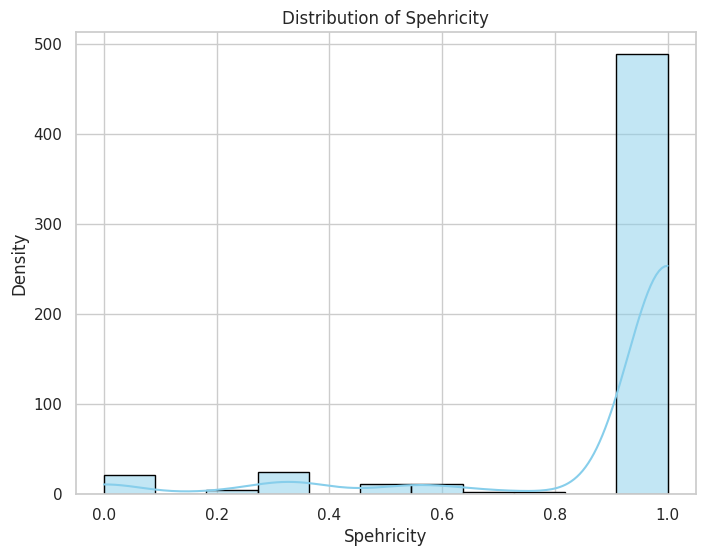

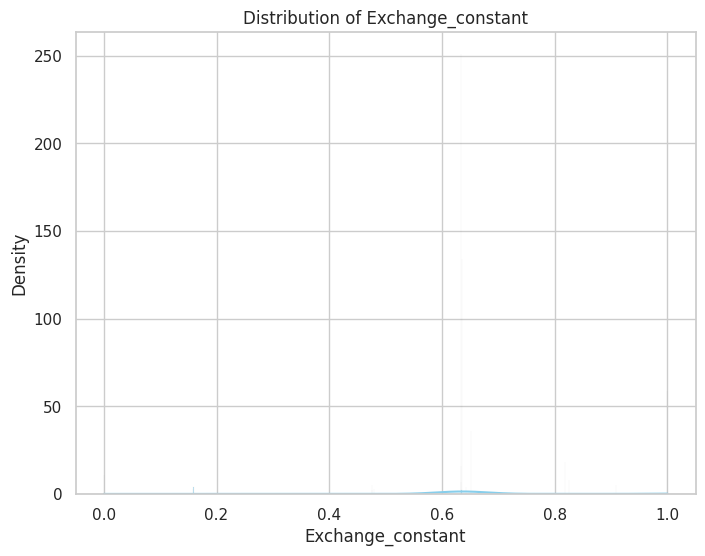

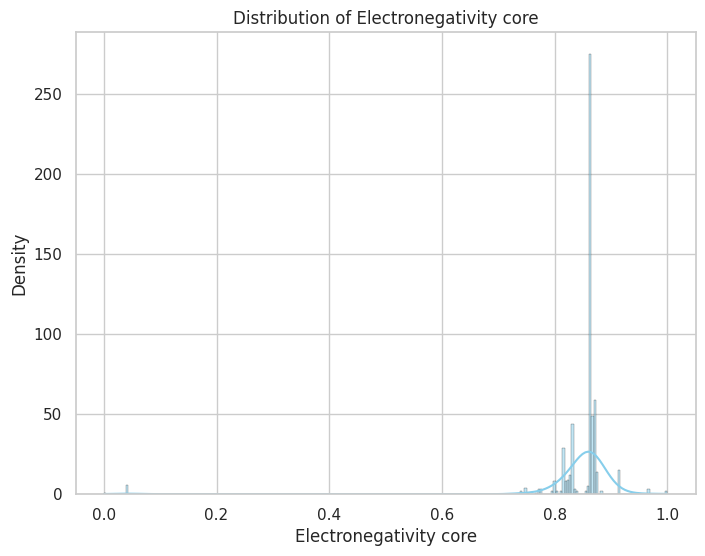

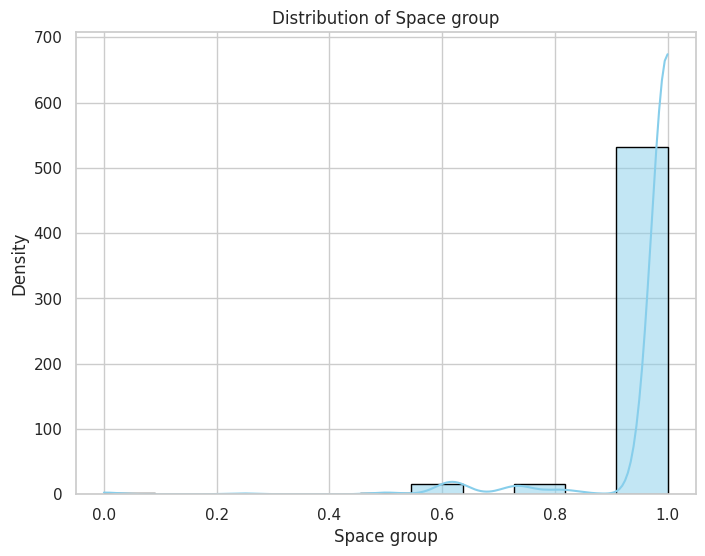

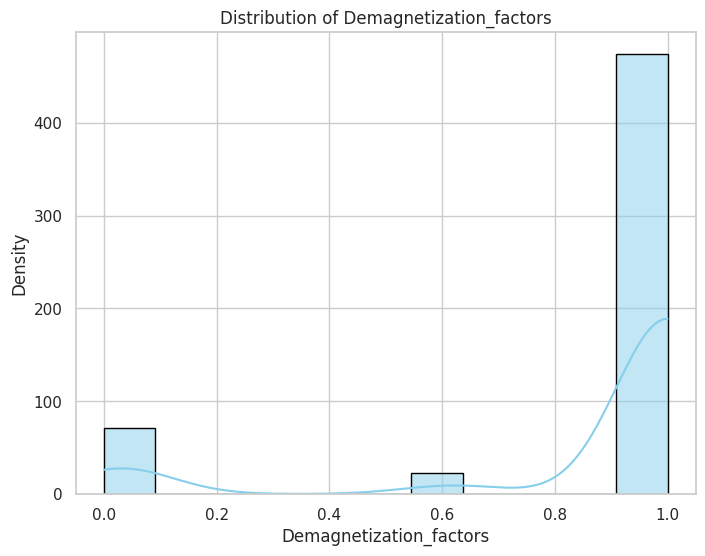

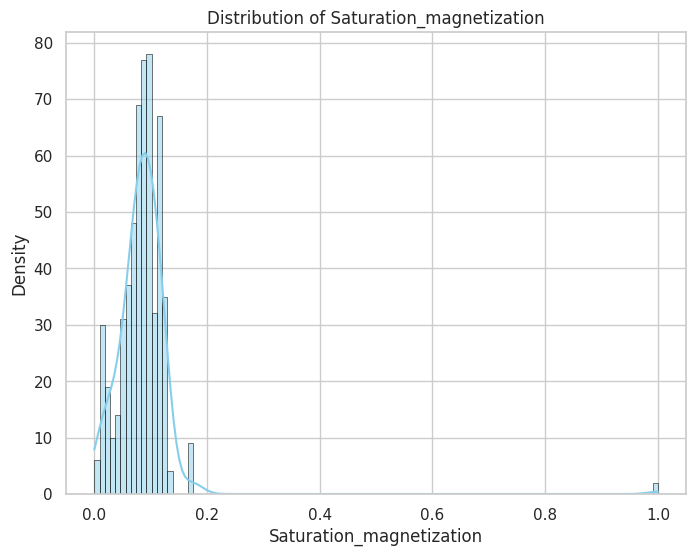

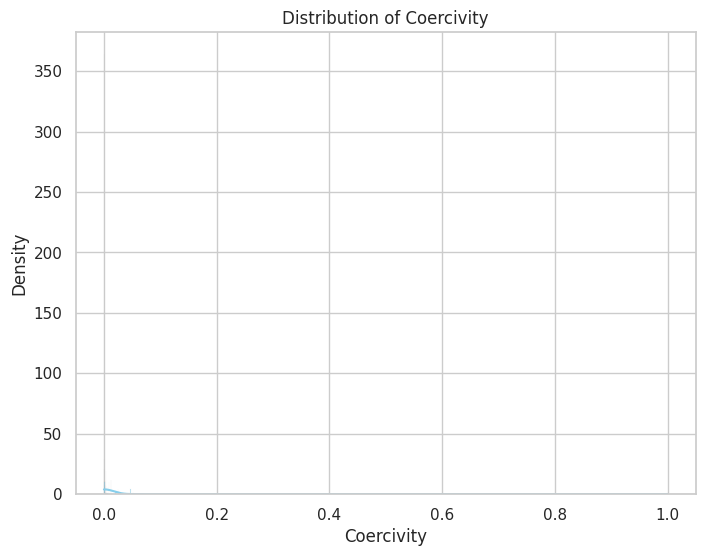

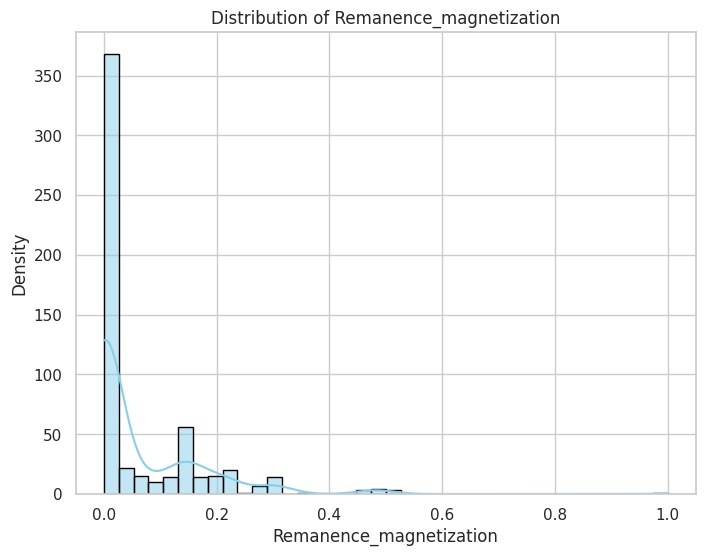

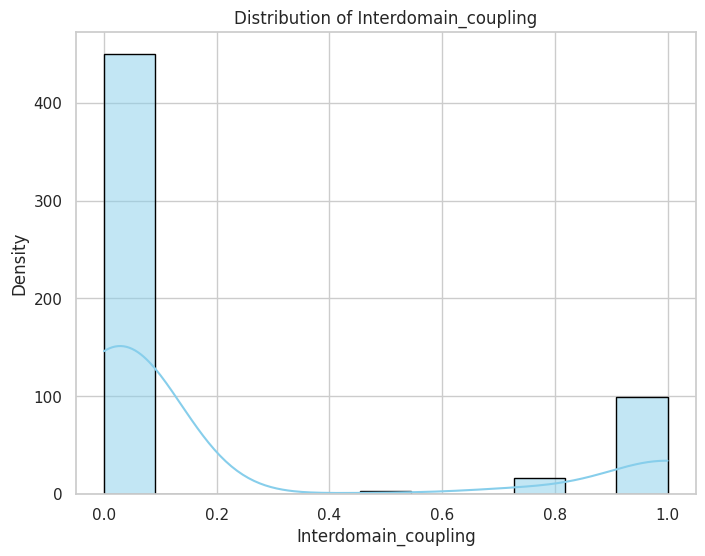

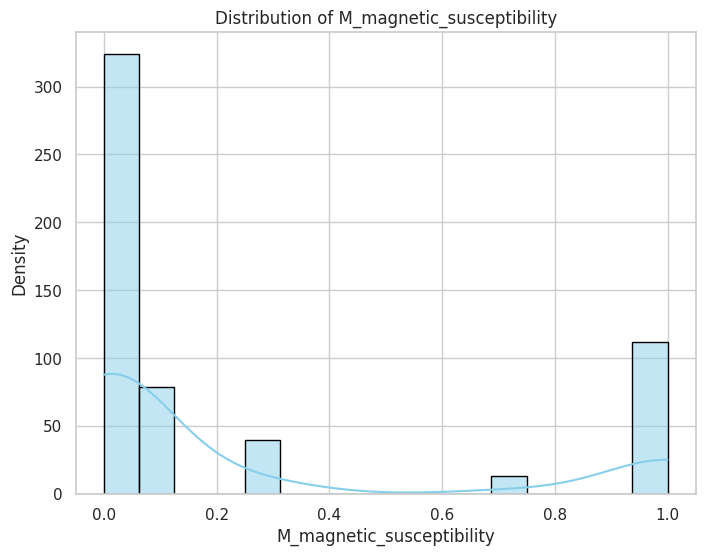

In [185]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

Составим списки, где значения справа будут убираться у колонок в списке columns_to_check_max, и левые у списка columns_to_check_min

In [186]:
columns_to_check_max = ['Eff_anisotropy_const', 'Coercivity', 'Saturation_magnetization']
columns_to_check_min = ['Electronegativity core']

Максимальные значения columns_to_check_max, что мы удалили

In [187]:
for column in columns_to_check_max:
    max_value = df[column].max()
    print(max_value)
    df = df[df[column] != max_value]

1.0
1.0
0.9999999999999998


Значение columns_to_check_min, что мы удалили

In [188]:
for column in columns_to_check_min:
    min_value = df[column].min()
    print(min_value)
    df = df[df[column] != min_value]

0.0


Так как распределение на вид логарифмическое, то нормализуем его соответственно

In [189]:
df['Coercivity'] = np.log1p(df['Coercivity'])

In [190]:
df['Coercivity'] = boxcox(df['Coercivity'] + 1)[0]  # +1 используется для избежания проблем с логарифмом для нулевых значений

scaler = StandardScaler()
df['Coercivity'] = scaler.fit_transform(df[['Coercivity']])

In [191]:
df['Coercivity'] = quantile_transform(df[['Coercivity']], n_quantiles=562, output_distribution='normal')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (562) is greater than the total number of samples (561). n_quantiles is set to n_samples.
  warnings.warn(


Вот какой график получился после преобразования логарифмической величины 'Coercivity'

<Axes: xlabel='Coercivity', ylabel='Count'>

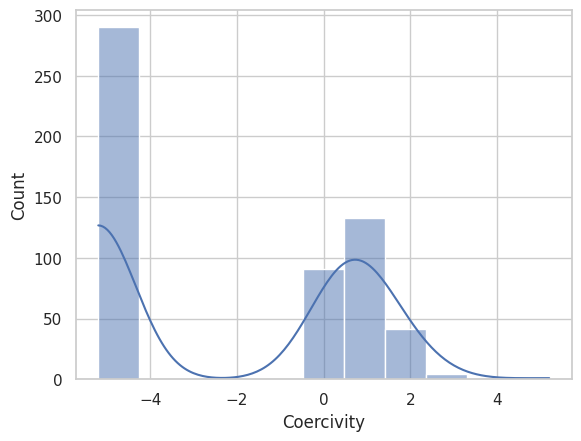

In [192]:
sns.histplot(df['Coercivity'], kde=True)

Похоже на логарифмическое рапределение Eff_anisotropy,  стоит ли тут почистить выбросы или преобразовать как Coercivity

<Axes: xlabel='Eff_anisotropy_const', ylabel='Count'>

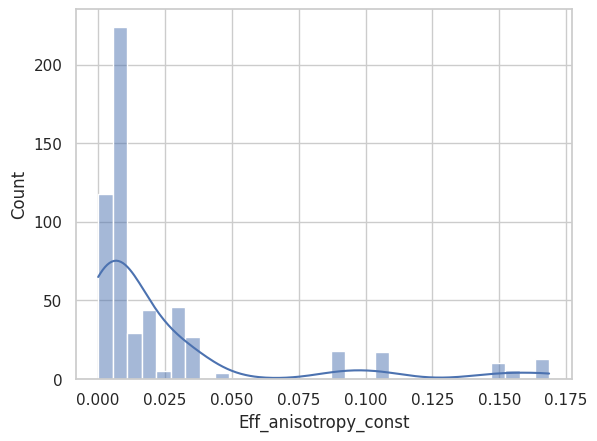

In [193]:
sns.histplot(df['Eff_anisotropy_const'], kde=True)

In [194]:
df['Eff_anisotropy_const'] = quantile_transform(df[['Eff_anisotropy_const']], n_quantiles=562, output_distribution='normal')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (562) is greater than the total number of samples (561). n_quantiles is set to n_samples.
  warnings.warn(


Используем квантили, чтобы прийти к более нормальному виду,  уже лучше, но, наверное нужно убрать часть аномалий? Пока трогать не будем

<Axes: xlabel='Eff_anisotropy_const', ylabel='Count'>

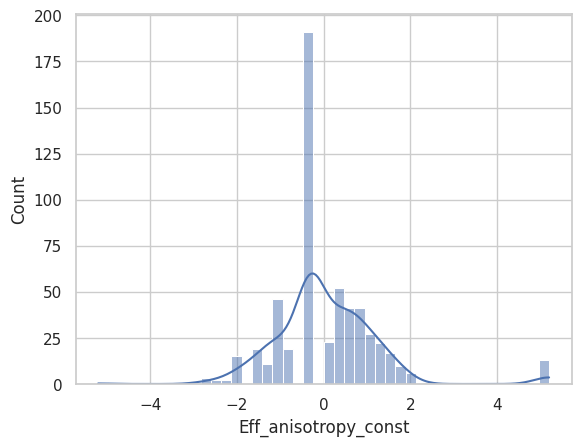

In [195]:
sns.histplot(df['Eff_anisotropy_const'], kde=True)

Преобразуем с помощью логарифма Anisotropy_constant

In [196]:
df['Anisotropy constant '] = np.log1p(df['Anisotropy constant '])

Как убрать появившиеся тут два пика? Может перевести в категориальный тип колонку Anisotropy constan? Пока трогать не будем

<Axes: xlabel='Anisotropy constant ', ylabel='Count'>

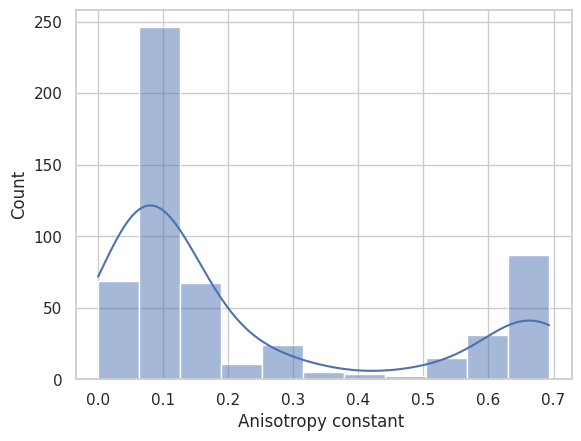

In [197]:
sns.histplot(df['Anisotropy constant '], kde=True)

Нужно ли тут убрать аномалии в 'Electronegativity core'?

In [206]:
for column in columns_to_check_min:
    min_value = df[column].min()
    print(min_value)
    df = df[df[column] != min_value]

0.04277456647398825


<Axes: xlabel='Electronegativity core', ylabel='Count'>

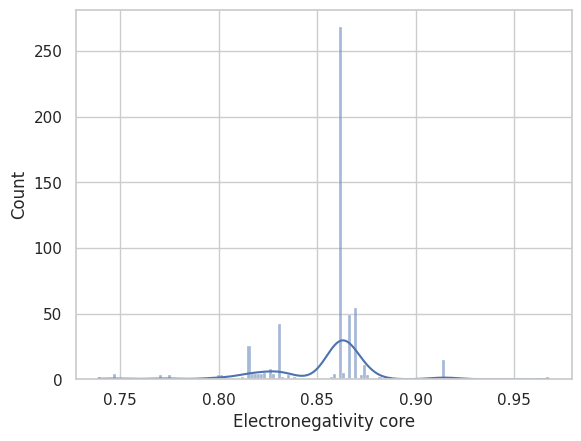

In [207]:
sns.histplot(df['Electronegativity core'], kde=True)

Переведём space group, Spehricity и crystalline в категориальный вид

In [199]:
category_list = ['Spehricity', 'Crystalline', 'Space group']

In [200]:
for i in category_list:
  df[i] = df[i].astype('category')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 567
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Area/volume                    555 non-null    float64 
 1   Max/min                        555 non-null    float64 
 2   org_coating_HAcceptors         555 non-null    float64 
 3   org_coating_LogP               555 non-null    float64 
 4   common_spin                    555 non-null    float64 
 5   Eff_anisotropy_const           555 non-null    float64 
 6   Magnetic_anisotropy            555 non-null    float64 
 7   Magnetocrystalline_anisotropy  555 non-null    float64 
 8   Anisotropy constant            555 non-null    float64 
 9   Crystalline                    555 non-null    category
 10  MAE                            555 non-null    float64 
 11  Curie_temperature              555 non-null    float64 
 12  Spehricity                     555 n

Как видно из распределений категориальных данных ниже, они все несбалансированные

<Axes: xlabel='Spehricity', ylabel='Count'>

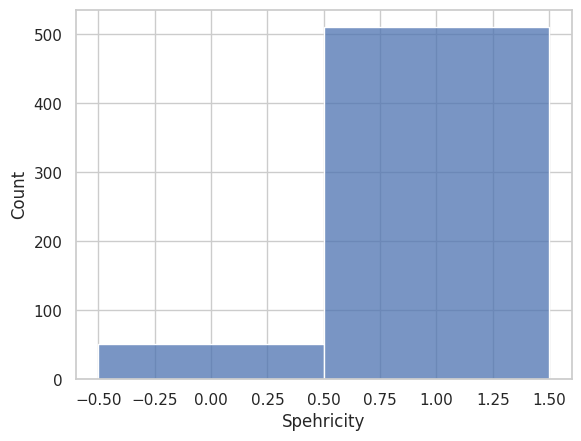

In [202]:
sns.histplot(df['Spehricity'])

<Axes: xlabel='Crystalline', ylabel='Count'>

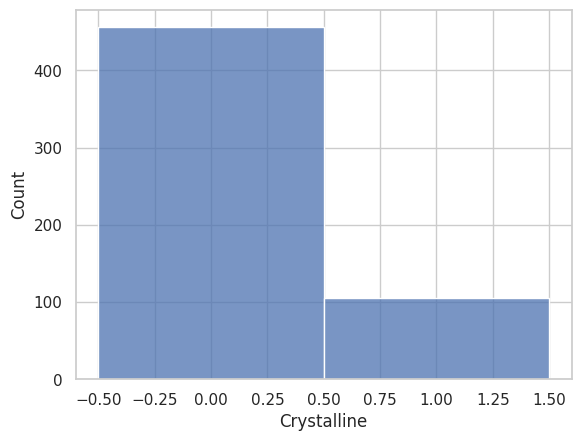

In [203]:
sns.histplot(df['Crystalline'])

<Axes: xlabel='Space group', ylabel='Count'>

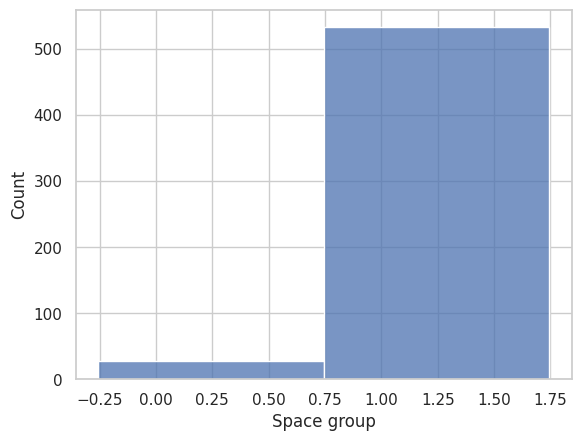

In [204]:
sns.histplot(df['Space group'])

In [209]:
df.to_csv('Distr_data.csv', index=False, float_format='%.3f') #сохраняем датасет